<a href="https://colab.research.google.com/github/Frans-Grau/Project-4_WebScraping/blob/main/F-EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
### Imports
import pandas as pd
import numpy as np
from unicodedata import normalize
import requests
import seaborn as sns
import matplotlib.pyplot as plt


In [45]:
### Data upload - csv database
# unicorns = pd.read_csv('https://raw.githubusercontent.com/Frans-Grau/Project-4_WebScraping/main/Database/List%20of%20Unicorns.csv')
unicorns = pd.read_csv(r'C:\Users\frans\Documents\GitHub\Project4-WebScrap\Files\old\List of Unicorns.csv')

In [46]:
### Data upload - wikipedia database
table_wiki = pd.read_html('https://en.wikipedia.org/wiki/List_of_unicorn_startup_companies')
wiki_unicorns = table_wiki[2]
#wiki_unicorns.to_pickle('wiki_unicorns.pickle')

### EDA I - Prepare & Merge both Datasets

In [47]:
### Rename & Drop columns
unicorns = unicorns.drop(['No.','Unnamed: 6','Unnamed: 7'], axis=1)
unicorns = unicorns.drop(['Key Investors'], axis = 1)
wiki_unicorns = wiki_unicorns.drop(['Valuation date','Founder(s)'], axis = 1)
unicorns = unicorns[['Name', 'Country','Industry','Valuation ($ Billion)']]
wiki_unicorns = wiki_unicorns[['Company','Country/ countries','Industry','Valuation (US$ billions)']]
wiki_unicorns = wiki_unicorns.rename(columns ={'Valuation (US$ billions)':'Valuation ($ Billion)', 'Company':'Name', 'Country/ countries':'Country'})

### Edit Numbers
wiki_unicorns['Valuation ($ Billion)'].replace({'5+':'5',"3+": "3", "2.1+": "2.1",'2+':'2','1.5+':'1.5','1+':'1','1.4+':'1.4'}, inplace=True)
wiki_unicorns['Valuation ($ Billion)'].replace('+','')
wiki_unicorns.drop(wiki_unicorns[wiki_unicorns['Valuation ($ Billion)'] == 'Undisclosed'].index, inplace = True)
wiki_unicorns['Valuation ($ Billion)'] = wiki_unicorns['Valuation ($ Billion)'].astype(float)
unicorns['Valuation ($ Billion)'] = unicorns['Valuation ($ Billion)'].astype(float)


### Merge both Datasets
final = pd.concat([unicorns,wiki_unicorns], axis=0)
final.reset_index(inplace=True)
final = final.drop(['index'], axis = 1)

### EDA II - Clean the final Dataset

In [48]:
### Check Duplicates
final['Name'] = final['Name'].str.lower()
final = final.drop_duplicates(subset = "Name")
final['Name'] = final['Name'].str.title()
final['Name'].replace({'Spacex':'SpaceX'}, inplace=True)

### Reset Index 
final.reset_index(inplace=True)
final = final.drop('index', axis =1)
final['Valuation ($ Billion)'] = final['Valuation ($ Billion)'].astype(float)

In [49]:
final['Industry'] = final['Industry'].replace(['Artificial intelligence'], 'Artificial Intelligence')
final['Industry'] = final['Industry'].replace(['Energy supply'], 'Energy')
final['Industry'] = final['Industry'].replace(['Mobile financial services'], 'Fintech')
final['Industry'] = final['Industry'].replace(['E-commerce, movie ticket distributor'], 'E-commerce')
final['Industry'] = final['Industry'].replace(['B2B e-commerce'], 'E-commerce')
final['Industry'] = final['Industry'].replace(['Agriculture, E-commerce'], 'E-commerce')
final['Industry'] = final['Industry'].replace(['Cloud software'], 'Cloud computing')


In [50]:
final.loc[final.Name == 'Talkdesk', 'Country'] = "Portugal"
final.loc[final.Name == 'Sword Health', 'Country'] = "Portugal"
final.loc[final.Name == 'Feedzai', 'Country'] = "Portugal"
final.loc[final.Name == 'Outsystems', 'Country'] = "Portugal"
final.loc[final.Name == 'Saltpay', 'Country'] = "Portugal"
final.loc[final.Name == 'Remote', 'Country'] = "Portugal"
final.loc[final.Name == 'Anchorage Digital', 'Country'] = "Portugal"

In [51]:
final['Country'] = final['Country'].replace(['UK'], 'United Kingdom')
final['Country'] = final['Country'].replace(['US'], 'United States')
final['Country'] = final['Country'].replace(['UAE'], 'United Arab Emirates')
final['Country'] = final['Country'].replace(['UK / UAE'], 'United Kingdom')
final['Country'] = final['Country'].replace(['China / Hong Kong'], 'China')
final['Country'] = final['Country'].replace(['China / US'], 'China')
final['Country'] = final['Country'].replace(['India / US'], 'India')
final['Country'] = final['Country'].replace(['Germany / Russia'], 'Germany')
final['Country'] = final['Country'].replace(['Indonesia / China'], 'Indonesia')
final['Country'] = final['Country'].replace(['Estonia / US'], 'Estonia') 
final['Country'] = final['Country'].replace(['India/ US'], 'India')
final['Country'] = final['Country'].replace(['US, UK and Europe'], 'United States')
final['Country'] = final['Country'].replace(['Czech Republic'], 'Czechia')
final['Country'] = final['Country'].replace(['Bahamas'], 'The Bahamas')

In [52]:
final[final['Name']=='Sword Health']

,Name,Country,Industry,Valuation ($ Billion)
475,Sword Health,Portugal,Health,2.0


In [53]:
final[final['Country'].str.contains('Republic')]

,Name,Country,Industry,Valuation ($ Billion)


In [54]:
final.to_csv('FinalUnicornsO6.csv')

### Visualizations

<AxesSubplot:xlabel='Country', ylabel='Valuation ($ Billion)'>

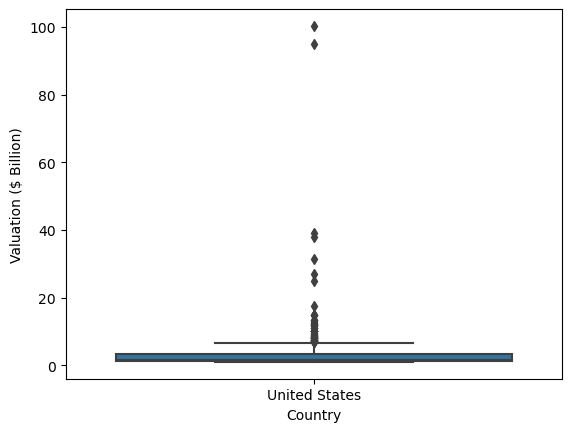

In [55]:
sns.boxplot(final[final['Country']=='United States'] , x = 'Country', y='Valuation ($ Billion)')

In [56]:
#sns.violinplot(unicorns[unicorns['Country']=='United States'])

In [57]:
#sns.displot(unicorns[unicorns['Country']=='United States'])